### Playground Notebook
A Notebook for running experiments on data

In [1]:
#Import package
import pandas as pd

In [2]:
housing = pd.read_csv('housing.csv')

Plotting the data to check the distribution

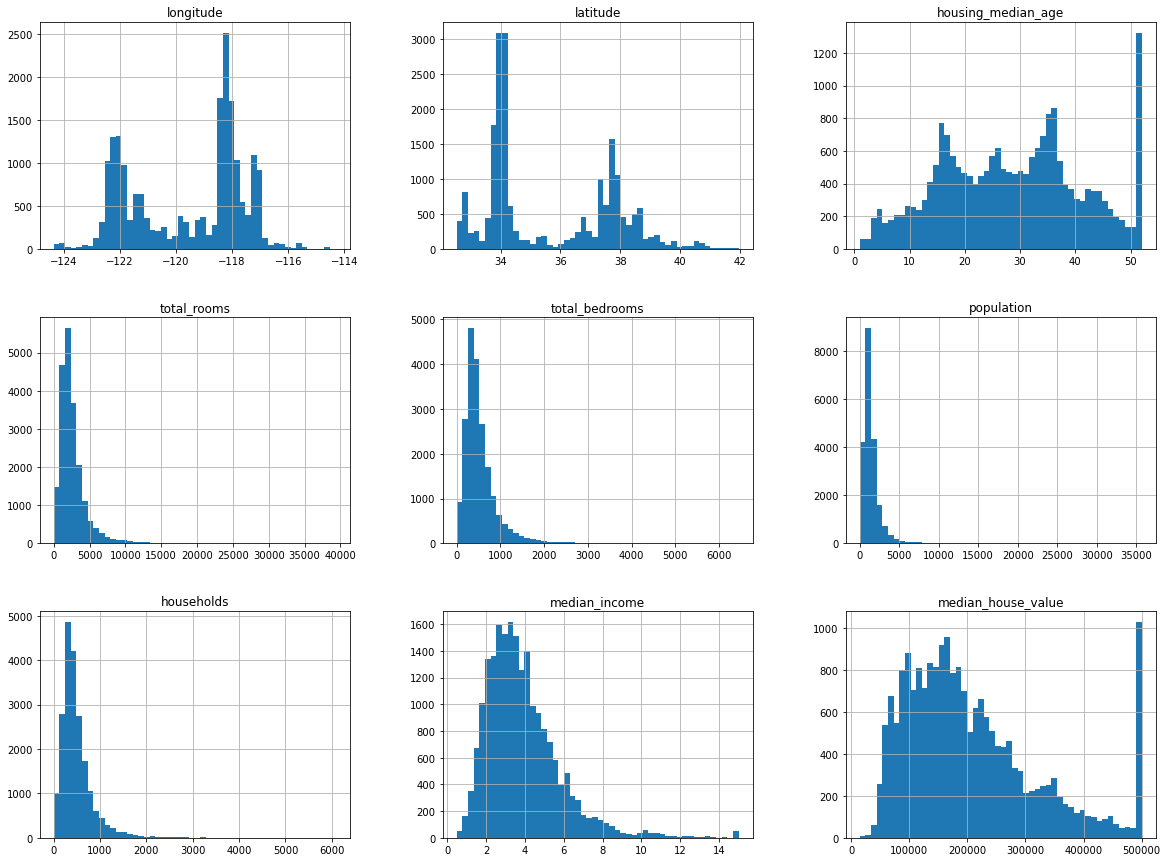

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.savefig('histograms.png')
plt.show()

### Goal
The goal is to transform the data using standard scaler and log transform and plot the data again to see if it made the distributions close to normal

In [4]:
housing_num = housing.drop("ocean_proximity",axis=1)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(housing_num)
X = scaler.transform(housing_num)

In [6]:
housing_transformed = pd.DataFrame(X, columns=housing_num.columns)
housing_transformed.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,1.172900
5,-1.337818,1.038503,1.856182,-0.786942,-0.770978,-0.894071,-0.801787,0.087447,0.544611
6,-1.337818,1.033821,1.856182,-0.046188,-0.115979,-0.292712,0.037823,-0.111366,0.800259
7,-1.337818,1.033821,1.856182,0.214634,0.353912,-0.237079,0.385698,-0.395137,0.299362
8,-1.342809,1.033821,1.061601,-0.037021,0.301702,-0.193810,0.249687,-0.942359,0.171971
9,-1.337818,1.033821,1.856182,0.418616,0.401375,0.110844,0.560944,-0.094470,0.470083


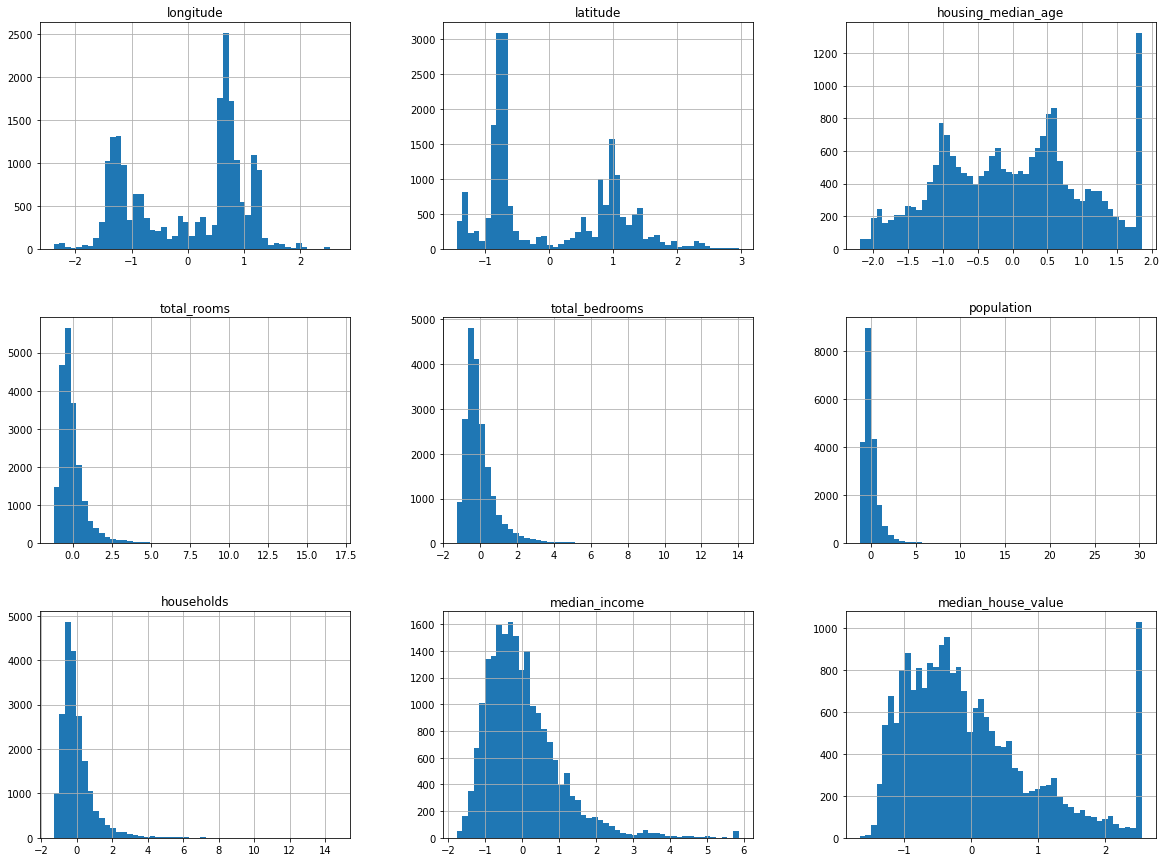

In [7]:
housing_transformed.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
import numpy as np
X = np.log(housing_num)

housing_transformed = pd.DataFrame(X, columns=housing_num.columns)

In [9]:
housing_transformed.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,NaN,3.634423,3.713572,6.779922,4.859812,5.774552,4.836282,2.119287,13.022764
1,NaN,3.633895,3.044522,8.867709,7.008505,7.783641,7.037028,2.116424,12.789684
2,NaN,3.633631,3.951244,7.290975,5.247024,6.206576,5.176150,1.982022,12.771671
3,NaN,3.633631,3.951244,7.149917,5.459586,6.324359,5.389072,1.730434,12.740517
4,NaN,3.633631,3.951244,7.394493,5.634790,6.336826,5.556828,1.347086,12.743151
5,NaN,3.633631,3.951244,6.823286,5.361292,6.023448,5.262690,1.395452,12.505066
6,NaN,3.633367,3.951244,7.837949,6.192362,6.997596,6.242223,1.297217,12.608868
7,NaN,3.633367,3.951244,8.040447,6.532334,7.053586,6.472346,1.137833,12.394211
8,NaN,3.633367,3.737670,7.845808,6.499787,7.095064,6.388561,0.732560,12.331383
9,NaN,3.633367,3.951244,8.174421,6.561031,7.346655,6.570883,1.305952,12.472659


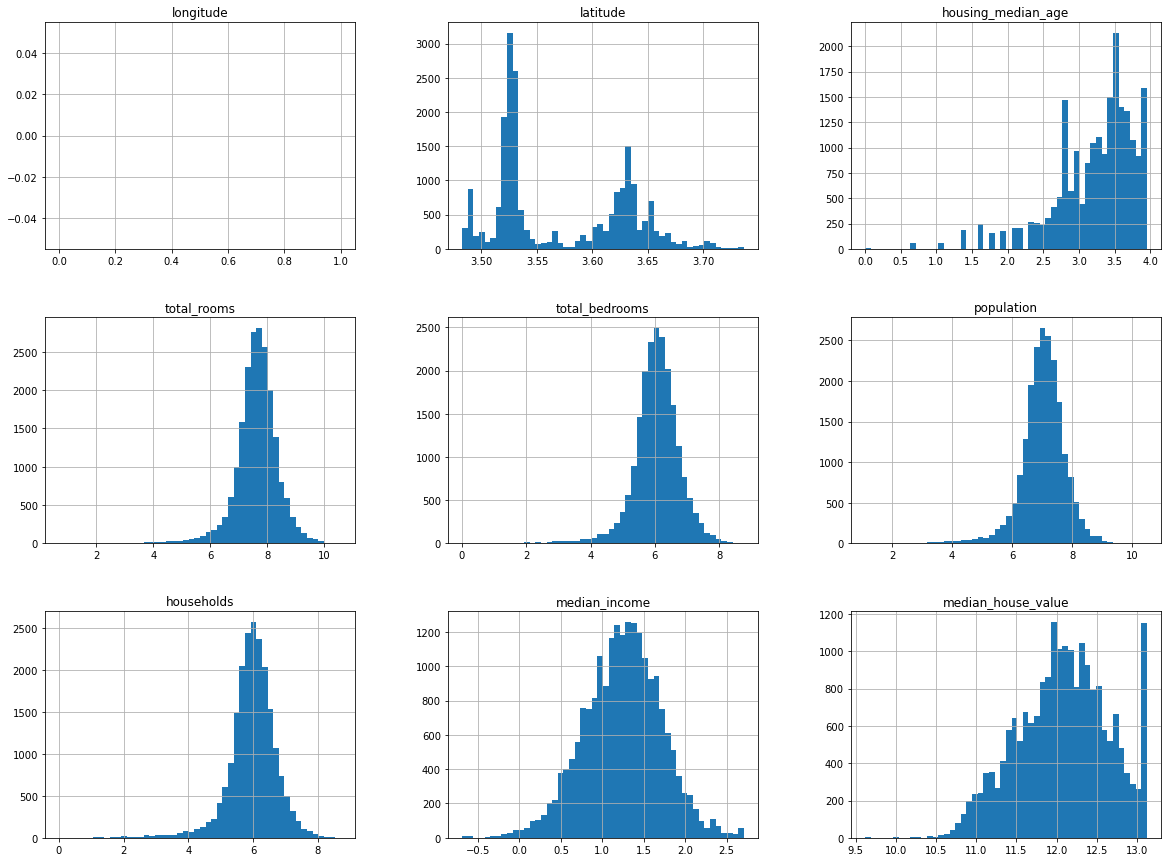

In [10]:
housing_transformed.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

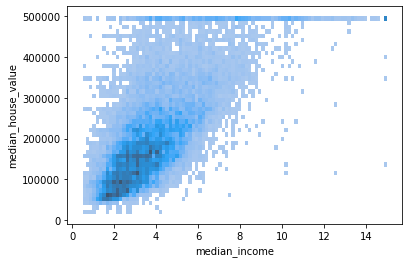

In [11]:
import seaborn as sns
sns.histplot(housing_num,x="median_income",y="median_house_value")

### Plot box and whisker plot

<AxesSubplot:>

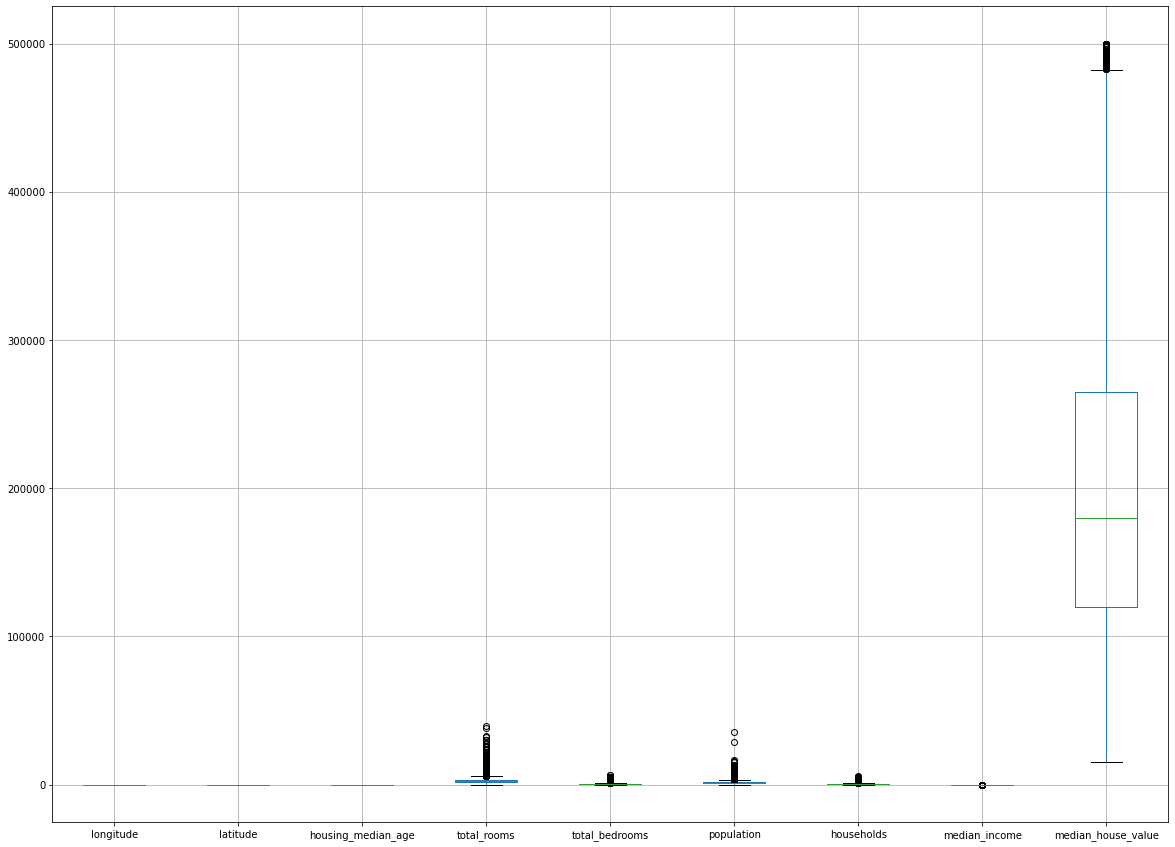

In [12]:
housing.boxplot(figsize=(20,15))

### Outlier detection
Finding which values are outliers
Methodology:
Assuming a Gaussian distribtution and looking for values that are more than 3 standard deviations from the mean

In [13]:
#Getting only the numerical attributes and dropping latitude and logitude
housing_num = housing.drop(["ocean_proximity","latitude","longitude"],axis=1)

In [14]:
#Finding the z-scores
housing_num_z_scores = np.abs((housing_num - housing_num.mean())/housing_num.std(ddof=0))
housing_num_z_scores

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.982143,0.804819,0.970325,0.974429,0.977033,2.344766,2.129631
1,0.607019,2.045890,1.348276,0.861439,1.669961,2.332238,1.314156
2,1.856182,0.535746,0.825561,0.820777,0.843637,1.782699,1.258693
3,1.856182,0.624215,0.718768,0.766028,0.733781,0.932968,1.165100
4,1.856182,0.462404,0.611974,0.759847,0.629157,0.012881,1.172900
...,...,...,...,...,...,...,...
20635,0.289187,0.444985,0.388895,0.512592,0.443449,1.216128,1.115804
20636,0.845393,0.888704,0.920488,0.944405,1.008420,0.691593,1.124470
20637,0.924851,0.174995,0.125472,0.369537,0.174042,1.142593,0.992746
20638,0.845393,0.355600,0.305834,0.604429,0.393753,1.054583,1.058608


C:\Users\Hassan\.conda\envs\ml-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

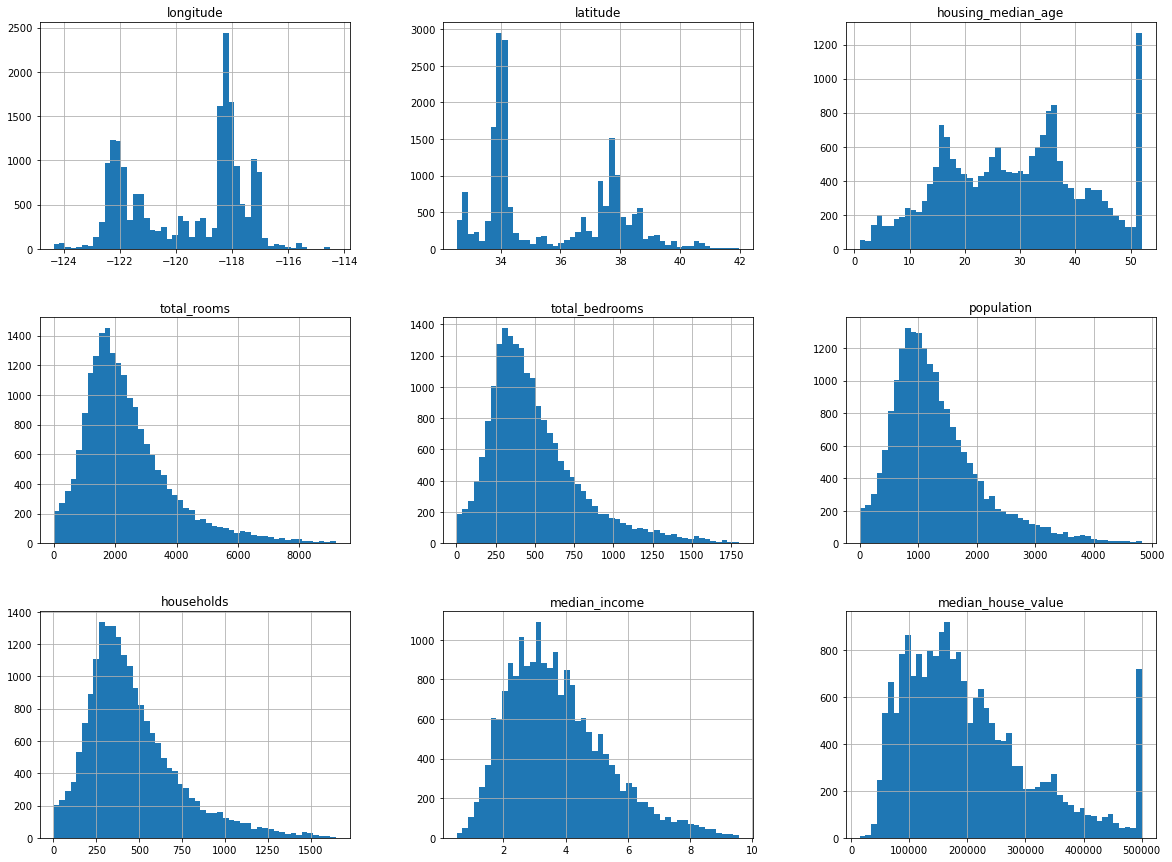

In [15]:
#Removing all the rows where the z score is greater than 3 in at least one column
# i.e. only keep the rows where z-score is less than 3 in all columns
housing_filtered = housing[(housing_num_z_scores < 3).all(axis=1)]
#reset index
housing_filtered.reset_index(inplace=True)
housing_filtered.drop('index',axis=1, inplace=True)
housing_filtered.hist(bins=50, figsize=(20,15))

### Creating test and training sets and training model 

C:\Users\Hassan\.conda\envs\ml-env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<AxesSubplot:>

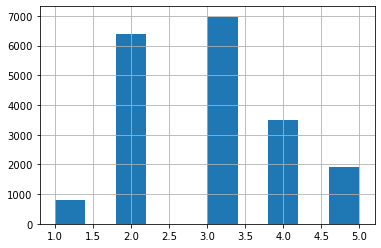

In [16]:
#Converting the income to a categorical attribute with 5 categories

housing_filtered["income_cat"] = pd.cut(housing_filtered["median_income"],
                              bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels =[1, 2, 3, 4, 5])
housing_filtered["income_cat"].hist()

In [17]:
#Now we can do stratified sampling based on the income category
#Using scikit-learn's StratifiedShuffleSplit class

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_filtered, housing_filtered["income_cat"]):
    strat_train_set = housing_filtered.loc[train_index]
    strat_test_set = housing_filtered.loc[test_index]

In [18]:
#Looking at the correlations
housing = strat_train_set.copy()
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.653723
total_rooms           0.164373
housing_median_age    0.121211
households            0.089570
total_bedrooms        0.069785
population           -0.038161
longitude            -0.047138
latitude             -0.145098
Name: median_house_value, dtype: float64